In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置正常显示符号(负号)
plt.rcParams['axes.unicode_minus'] = False

需求分析——旺季淡季，最能接受的旅游天数，人均消费，旅游方式，热门地区

# 一.数据预处理

## 1.数据解析

In [2]:
df = pd.read_excel(r'./data/旅游网站精华游记数据.xlsx')
df.head(10)

,标题,出发日期,天数,人均消费（元）,旅行标签,阅览数,途经地点
0,2022杭州赏樱 樱花烂漫几多时？樱飞漫山花归谷，打卡浙版“奈良吉野山”,2022-03-26 出发,共2天,人均500元,自驾 赏樱 踏春,8764,途经：杭州
1,丽水遂昌，春风十里不如你！,2022-03-16 出发,共3天,人均2000元,美食 自驾 第一次,4万,途经：遂昌
2,春日川藏线，邂逅雪山桃花与壮丽河山（内含大量视频）,2022-03-18 出发,共3天,NaN,NaN,51,途经：拉萨
3,温州旅行，走进华东大峡谷氡泉旅游度假区,2022-03-17 出发,共1天,NaN,NaN,5.6万,途经：温州>泰顺
4,【宝藏纪念】大美山西，表里山河，与历史重逢（山西自驾游）,2022-03-03 出发,共7天,人均1400元,自驾 踏春,9233,NaN
5,阳春三月，来长白山体验12度粉雪,2022-03-03 出发,共4天,人均4000元,冬季,45,途经：重庆
6,不一样的日本‖山阴山阳地区五“美”推荐,2021-03-05 出发,共7天,人均9999元,购物 美食 温泉 踏春 摄影,1.2万,途经：日本(山口市Yamaguchi)
7,吴地风华，山明水秀，和我一起来探索无锡吧！,2022-03-11 出发,共3天,人均3000元,美食 暑假 短途周末 踏春 探险 第一次,7.2万,途经：无锡
8,江苏盐城｜赏花夜游逛馆拍照，赴一场春日盐系旅行,2022-03-11 出发,共1天,NaN,赏樱 探险,2.4万,途经：盐城
9,江苏小众旅行地，精致江南风格的小城镇江,2022-03-10 出发,共1天,NaN,NaN,3.8万,途经：镇江


In [3]:
def dealplace(place): #筛选途径地点中的中文地名
    s = '' #定义一个空字符串
    if type(place)==str:
        for c in place:
            if not ((c>='a')and(c<='z'))or((c>='A')and(c<='Z')):
                s = s+c
    else:
        s = place
    return s    

In [4]:
df['途经地点'] = df['途经地点'].apply(lambda x:dealplace(x)) # 将dealplace函数应用到‘途经地点’字段
df['途经地点'] = df['途经地点'].str.replace('途经：', '').str.replace('>', '、')
df.head(20)

,标题,出发日期,天数,人均消费（元）,旅行标签,阅览数,途经地点
0,2022杭州赏樱 樱花烂漫几多时？樱飞漫山花归谷，打卡浙版“奈良吉野山”,2022-03-26 出发,共2天,人均500元,自驾 赏樱 踏春,8764,杭州
1,丽水遂昌，春风十里不如你！,2022-03-16 出发,共3天,人均2000元,美食 自驾 第一次,4万,遂昌
2,春日川藏线，邂逅雪山桃花与壮丽河山（内含大量视频）,2022-03-18 出发,共3天,NaN,NaN,51,拉萨
3,温州旅行，走进华东大峡谷氡泉旅游度假区,2022-03-17 出发,共1天,NaN,NaN,5.6万,温州、泰顺
4,【宝藏纪念】大美山西，表里山河，与历史重逢（山西自驾游）,2022-03-03 出发,共7天,人均1400元,自驾 踏春,9233,NaN
5,阳春三月，来长白山体验12度粉雪,2022-03-03 出发,共4天,人均4000元,冬季,45,重庆
6,不一样的日本‖山阴山阳地区五“美”推荐,2021-03-05 出发,共7天,人均9999元,购物 美食 温泉 踏春 摄影,1.2万,日本(山口市Y)
7,吴地风华，山明水秀，和我一起来探索无锡吧！,2022-03-11 出发,共3天,人均3000元,美食 暑假 短途周末 踏春 探险 第一次,7.2万,无锡
8,江苏盐城｜赏花夜游逛馆拍照，赴一场春日盐系旅行,2022-03-11 出发,共1天,NaN,赏樱 探险,2.4万,盐城
9,江苏小众旅行地，精致江南风格的小城镇江,2022-03-10 出发,共1天,NaN,NaN,3.8万,镇江


In [5]:
def dealview(view):# 处理阅览数当中的数据
    num = view
    if type(num) == str:
        if '万' in num:
            if '.' in num:
                num = num.replace('.','').replace('万','000')
            else:
                num = num.replace('万','0000')
    return num

In [6]:
df['阅览数'] = df['阅览数'].apply(lambda x:dealview(x)).astype('int') #astype('int')可用于转化D对象每一列的数据类型
df.head()

,标题,出发日期,天数,人均消费（元）,旅行标签,阅览数,途经地点
0,2022杭州赏樱 樱花烂漫几多时？樱飞漫山花归谷，打卡浙版“奈良吉野山”,2022-03-26 出发,共2天,人均500元,自驾 赏樱 踏春,8764,杭州
1,丽水遂昌，春风十里不如你！,2022-03-16 出发,共3天,人均2000元,美食 自驾 第一次,40000,遂昌
2,春日川藏线，邂逅雪山桃花与壮丽河山（内含大量视频）,2022-03-18 出发,共3天,NaN,NaN,51,拉萨
3,温州旅行，走进华东大峡谷氡泉旅游度假区,2022-03-17 出发,共1天,NaN,NaN,56000,温州、泰顺
4,【宝藏纪念】大美山西，表里山河，与历史重逢（山西自驾游）,2022-03-03 出发,共7天,人均1400元,自驾 踏春,9233,NaN


In [7]:
df['出发日期'].str.split(expand=True) #expand=True直接将分列后的结果转换成D对象

,0,1
0,2022-03-26,出发
1,2022-03-16,出发
2,2022-03-18,出发
3,2022-03-17,出发
4,2022-03-03,出发
...,...,...
1995,2017-05-16,出发
1996,2017-03-25,出发
1997,2017-06-01,出发
1998,2017-05-29,出发


In [8]:
df['出发日期'] = df['出发日期'].str.split(expand=True) [0]
df.head()

,标题,出发日期,天数,人均消费（元）,旅行标签,阅览数,途经地点
0,2022杭州赏樱 樱花烂漫几多时？樱飞漫山花归谷，打卡浙版“奈良吉野山”,2022-03-26,共2天,人均500元,自驾 赏樱 踏春,8764,杭州
1,丽水遂昌，春风十里不如你！,2022-03-16,共3天,人均2000元,美食 自驾 第一次,40000,遂昌
2,春日川藏线，邂逅雪山桃花与壮丽河山（内含大量视频）,2022-03-18,共3天,NaN,NaN,51,拉萨
3,温州旅行，走进华东大峡谷氡泉旅游度假区,2022-03-17,共1天,NaN,NaN,56000,温州、泰顺
4,【宝藏纪念】大美山西，表里山河，与历史重逢（山西自驾游）,2022-03-03,共7天,人均1400元,自驾 踏春,9233,NaN


In [9]:
df['天数'] = df['天数'].str.slice(1, -1).astype('int') # 取天数数字
df.head()

,标题,出发日期,天数,人均消费（元）,旅行标签,阅览数,途经地点
0,2022杭州赏樱 樱花烂漫几多时？樱飞漫山花归谷，打卡浙版“奈良吉野山”,2022-03-26,2,人均500元,自驾 赏樱 踏春,8764,杭州
1,丽水遂昌，春风十里不如你！,2022-03-16,3,人均2000元,美食 自驾 第一次,40000,遂昌
2,春日川藏线，邂逅雪山桃花与壮丽河山（内含大量视频）,2022-03-18,3,NaN,NaN,51,拉萨
3,温州旅行，走进华东大峡谷氡泉旅游度假区,2022-03-17,1,NaN,NaN,56000,温州、泰顺
4,【宝藏纪念】大美山西，表里山河，与历史重逢（山西自驾游）,2022-03-03,7,人均1400元,自驾 踏春,9233,NaN


In [10]:
df['人均消费（元）'] = df['人均消费（元）'].str.slice(2, -1) # 取人均消费数字
df.head()

,标题,出发日期,天数,人均消费（元）,旅行标签,阅览数,途经地点
0,2022杭州赏樱 樱花烂漫几多时？樱飞漫山花归谷，打卡浙版“奈良吉野山”,2022-03-26,2,500,自驾 赏樱 踏春,8764,杭州
1,丽水遂昌，春风十里不如你！,2022-03-16,3,2000,美食 自驾 第一次,40000,遂昌
2,春日川藏线，邂逅雪山桃花与壮丽河山（内含大量视频）,2022-03-18,3,NaN,NaN,51,拉萨
3,温州旅行，走进华东大峡谷氡泉旅游度假区,2022-03-17,1,NaN,NaN,56000,温州、泰顺
4,【宝藏纪念】大美山西，表里山河，与历史重逢（山西自驾游）,2022-03-03,7,1400,自驾 踏春,9233,NaN


## 2.重复值处理

In [11]:
df[df.duplicated(subset=['标题']) == True] # 只检查标题重复

,标题,出发日期,天数,人均消费（元）,旅行标签,阅览数,途经地点
186,初夏是相爱的第3650天，呼伦贝尔爱之行,2021-07-02,1,NaN,婚纱 夏季,47000,呼伦贝尔
680,解锁广州自驾1.5小时亲子周边游，乐游北回归线上的森林海与白水寨，带家庭的朋友不要错过,2020-04-13,3,NaN,温泉 自驾,44,广州
681,解锁广州自驾1.5小时亲子周边游，乐游北回归线上的森林海与白水寨，带家庭的朋友不要错过,2020-04-13,4,NaN,温泉 自驾,13,NaN
682,解锁广州自驾1.5小时亲子周边游，乐游北回归线上的森林海与白水寨，带家庭的朋友不要错过,2020-04-13,5,NaN,温泉 自驾,19,NaN
683,解锁广州自驾1.5小时亲子周边游，乐游北回归线上的森林海与白水寨，带家庭的朋友不要错过,2020-04-13,2,NaN,温泉 自驾,36,NaN
788,成都超全旅游攻略|在这个秋季，让我们相约在成都,2019-11-01,4,NaN,赏秋,50000,成都
799,转山吧，去雨崩，天堂不远人生很值！,2019-12-02,1,NaN,NaN,32,梅里雪山M
983,新疆10天9夜包车游，感受真实的西域风情，打卡电影里那些火热的拍摄地,2019-05-20,10,8000,NaN,417,博乐、特克斯、吐鲁番、乌鲁木齐、伊宁
995,山城自驾72小时必体验，雾里雨里等风也等你,2019-05-05,3,NaN,漫游 自驾 摄影,37,NaN
1117,蹲日出、躲正午、追夕阳，这里的时光仿佛静止了（我们拍出了吴哥最温情的一面）,2019-02-19,6,NaN,摄影,39,柬埔寨(暹粒S R)


In [12]:
df.drop_duplicates(subset=['标题'], inplace=True)
df[df.duplicated(subset=['标题']) == True] # 只检查标题重复

,标题,出发日期,天数,人均消费（元）,旅行标签,阅览数,途经地点


## 3.缺失值处理

In [13]:
df.isnull().sum()

标题           0
出发日期         0
天数           0
人均消费（元）    395
旅行标签       110
阅览数          0
途经地点        75
dtype: int64

In [14]:
df.T.isnull().sum() # T:转置

0       0
1       0
2       2
3       2
4       1
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Length: 1984, dtype: int64

In [15]:
df[df.T.isnull().sum() > 2]

,标题,出发日期,天数,人均消费（元）,旅行标签,阅览数,途经地点
244,青岛二三事 | 雨天晴天，在青岛遇见慢时光,2021-04-01,5,NaN,NaN,609,NaN
423,借山而居，“青城先生”的写意生活,2020-11-20,3,NaN,NaN,225,NaN
427,福州三日自由行，打卡醉美海岸风光,2020-12-07,3,NaN,NaN,59,NaN
1688,#发现国内冷门地 “冶勒湖、孟获城”——隐藏在川西大凉山里的中国肯尼亚,2018-01-19,2,NaN,NaN,28,NaN
1744,时间旅店,2017-07-24,1,NaN,NaN,12,NaN


In [16]:
'删除前的行数:' + str(len(df))

'删除前的行数:1984'

In [17]:
df.dropna(how='all', thresh=5, inplace=True) # any:存在缺失即删除, all:全部缺失即删除 | thresh:5个及以上字段有数据则保留
'删除前的后数:' + str(len(df))

'删除前的后数:1979'

## 4.异常值处理

In [18]:
series = df['天数'][df['天数'] > 15]
'删除前的行数:' + str(len(df))

'删除前的行数:1979'

In [19]:
df.drop(series.index, axis=0, inplace=True)
'删除后的行数:' + str(len(df))

'删除后的行数:1923'

In [20]:
df.to_excel(r'./旅游网站精华游记数据(预处理).xlsx')
'保存成功'

'保存成功'

# 二.数据分析与可视化

In [21]:
df = pd.read_excel(r'./旅游网站精华游记数据(预处理).xlsx')
df.head(10)

,Unnamed: 0,标题,出发日期,天数,人均消费（元）,旅行标签,阅览数,途经地点
0,0,2022杭州赏樱 樱花烂漫几多时？樱飞漫山花归谷，打卡浙版“奈良吉野山”,2022-03-26,2,500.0,自驾 赏樱 踏春,8764,杭州
1,1,丽水遂昌，春风十里不如你！,2022-03-16,3,2000.0,美食 自驾 第一次,40000,遂昌
2,2,春日川藏线，邂逅雪山桃花与壮丽河山（内含大量视频）,2022-03-18,3,NaN,NaN,51,拉萨
3,3,温州旅行，走进华东大峡谷氡泉旅游度假区,2022-03-17,1,NaN,NaN,56000,温州、泰顺
4,4,【宝藏纪念】大美山西，表里山河，与历史重逢（山西自驾游）,2022-03-03,7,1400.0,自驾 踏春,9233,NaN
5,5,阳春三月，来长白山体验12度粉雪,2022-03-03,4,4000.0,冬季,45,重庆
6,6,不一样的日本‖山阴山阳地区五“美”推荐,2021-03-05,7,9999.0,购物 美食 温泉 踏春 摄影,12000,日本(山口市Y)
7,7,吴地风华，山明水秀，和我一起来探索无锡吧！,2022-03-11,3,3000.0,美食 暑假 短途周末 踏春 探险 第一次,72000,无锡
8,8,江苏盐城｜赏花夜游逛馆拍照，赴一场春日盐系旅行,2022-03-11,1,NaN,赏樱 探险,24000,盐城
9,9,江苏小众旅行地，精致江南风格的小城镇江,2022-03-10,1,NaN,NaN,38000,镇江


## 1.旅游月份分析

In [22]:
df['月份'] = pd.to_datetime(df['出发日期']).dt.month # 添加月份一列
df.head()

,Unnamed: 0,标题,出发日期,天数,人均消费（元）,旅行标签,阅览数,途经地点,月份
0,0,2022杭州赏樱 樱花烂漫几多时？樱飞漫山花归谷，打卡浙版“奈良吉野山”,2022-03-26,2,500.0,自驾 赏樱 踏春,8764,杭州,3
1,1,丽水遂昌，春风十里不如你！,2022-03-16,3,2000.0,美食 自驾 第一次,40000,遂昌,3
2,2,春日川藏线，邂逅雪山桃花与壮丽河山（内含大量视频）,2022-03-18,3,NaN,NaN,51,拉萨,3
3,3,温州旅行，走进华东大峡谷氡泉旅游度假区,2022-03-17,1,NaN,NaN,56000,温州、泰顺,3
4,4,【宝藏纪念】大美山西，表里山河，与历史重逢（山西自驾游）,2022-03-03,7,1400.0,自驾 踏春,9233,NaN,3


In [23]:
df.to_excel(r'./旅游网站精华游记数据(预处理).xlsx', index=False)

In [24]:
month = df.groupby('月份').size() # 按月份分组, 获得统计个数
month

月份
1     148
2      95
3     111
4     165
5     137
6     139
7     202
8     123
9     228
10    220
11    179
12    176
dtype: int64

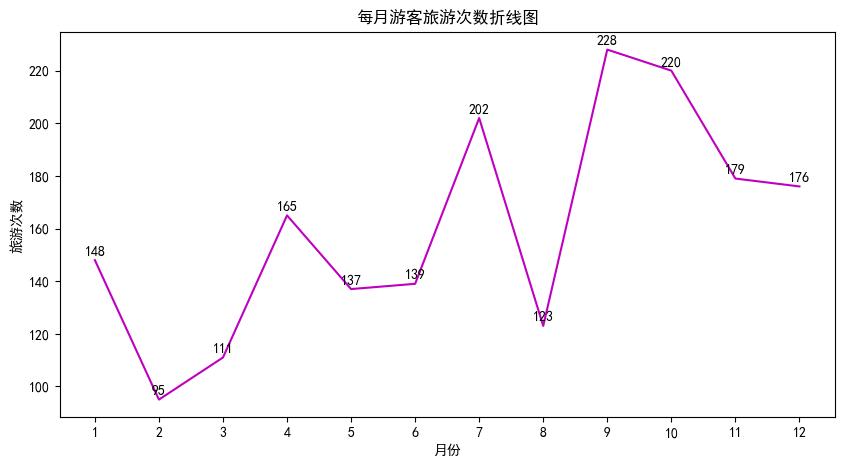

In [25]:
plt.figure(figsize=(10, 5)) # 设置一个10*5的画布
plt.title('每月游客旅游次数折线图')
plt.xlabel('月份')
plt.xticks(range(1, 13))
plt.ylabel('旅游次数')
plt.plot(month.index, month, color='m')
for i,j in zip(range(len(month)), month):
    plt.text(i+1, j+1, j, ha='center', va='bottom')
plt.show()

## 2.旅游天数和人均消费分析

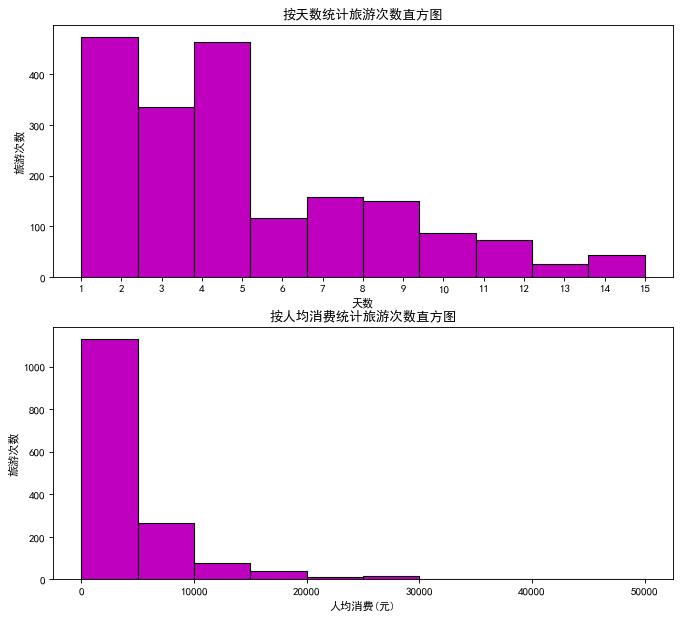

In [26]:
plt.figure(figsize=(10, 9), dpi=80)
# 第一个子图
plt.subplot(2, 1, 1)
plt.title('按天数统计旅游次数直方图')
plt.xlabel('天数')
plt.ylabel('旅游次数')
plt.xticks(range(1, 16))
plt.hist(df['天数'], color='m', edgecolor='k')
# 第二个子图
plt.subplot(2, 1, 2)
plt.title('按人均消费统计旅游次数直方图')
plt.xlabel('人均消费(元)')
plt.ylabel('旅游次数')
plt.hist(list(df['人均消费（元）']), color='m', edgecolor='k')
plt.show()

## 3.旅游方式分析

In [27]:
data_label = df['旅行标签'].dropna()
data_label

0                     自驾 赏樱 踏春
1                    美食 自驾 第一次
4                        自驾 踏春
5                           冬季
6               购物 美食 温泉 踏春 摄影
                 ...          
1918              古镇 毕业游 摄影 徒步
1919                海滨海岛 赏樱 摄影
1920                        环游
1921    购物 美食 漫游 海滨海岛 自驾 摄影 人文
1922         美食 海滨海岛 潜水 冬季 第一次
Name: 旅行标签, Length: 1819, dtype: object

In [28]:
label = data_label.str.split()
label

0                         [自驾, 赏樱, 踏春]
1                        [美食, 自驾, 第一次]
4                             [自驾, 踏春]
5                                 [冬季]
6                 [购物, 美食, 温泉, 踏春, 摄影]
                     ...              
1918                 [古镇, 毕业游, 摄影, 徒步]
1919                    [海滨海岛, 赏樱, 摄影]
1920                              [环游]
1921    [购物, 美食, 漫游, 海滨海岛, 自驾, 摄影, 人文]
1922           [美食, 海滨海岛, 潜水, 冬季, 第一次]
Name: 旅行标签, Length: 1819, dtype: object

In [29]:
label_list = []
for i in label:
    label_list.extend(i)
label_list

['自驾',
 '赏樱',
 '踏春',
 '美食',
 '自驾',
 '第一次',
 '自驾',
 '踏春',
 '冬季',
 '购物',
 '美食',
 '温泉',
 '踏春',
 '摄影',
 '美食',
 '暑假',
 '短途周末',
 '踏春',
 '探险',
 '第一次',
 '赏樱',
 '探险',
 '购物',
 '美食',
 '短途周末',
 '美食',
 '美食',
 '短途周末',
 '摄影',
 '冬季',
 '第一次',
 '骑行',
 '短途周末',
 '踏春',
 '摄影',
 '深度游',
 '穷游',
 '古镇',
 '骑行',
 '摄影',
 '冬季',
 '人文',
 '美食',
 '徒步',
 '第一次',
 '摄影',
 '冬季',
 '美食',
 '自驾',
 '自驾',
 '探险',
 '美食',
 '自驾',
 '短途周末',
 '探险',
 '春节',
 '美食',
 '古镇',
 '徒步',
 '第一次',
 '自驾',
 '短途周末',
 '冬季',
 '春节',
 '深度游',
 '跨年',
 '购物',
 '漫游',
 '美食',
 '温泉',
 '骑行',
 '春节',
 '漫游',
 '美食',
 '滑雪',
 '冬季',
 '美食',
 '温泉',
 '冬季',
 '跨年',
 '美食',
 '滑雪',
 '美食',
 '古镇',
 '寒假',
 '摄影',
 '冬季',
 '深度游',
 '跨年',
 '美食',
 '海滨海岛',
 '冬季',
 '自驾',
 '赏秋',
 '跨年',
 '人文',
 '圣诞',
 '美食',
 '温泉',
 '自驾',
 '短途周末',
 '冬季',
 '美食',
 '自驾',
 '寒假',
 '短途周末',
 '冬季',
 '美食',
 '古镇',
 '深度游',
 '古镇',
 '夏季',
 '美食',
 '温泉',
 '赏秋',
 '自驾',
 '赏秋',
 '第一次',
 '深度游',
 '美食',
 '温泉',
 '自驾',
 '深度游',
 '美食',
 '古镇',
 '自驾',
 '深度游',
 '温泉',
 '赏秋',
 '冬季',
 '温泉',
 '自驾',
 '深度游',
 '自驾',
 '短途周末',
 '冬季',
 '深度游',
 '自驾',

In [30]:
df_label = DataFrame(label_list, columns=['标签'])
df_label

,标签
0,自驾
1,赏樱
2,踏春
3,美食
4,自驾
...,...
6966,美食
6967,海滨海岛
6968,潜水
6969,冬季


In [31]:
df_label['次数'] = 1
df_label

,标签,次数
0,自驾,1
1,赏樱,1
2,踏春,1
3,美食,1
4,自驾,1
...,...,...
6966,美食,1
6967,海滨海岛,1
6968,潜水,1
6969,冬季,1


In [32]:
df_label_count = df_label.groupby('标签').agg('count').sort_values(by='次数', ascending=False).head()
df_label_count

,次数
标签,
美食,1113
摄影,820
自驾,453
深度游,445
短途周末,365


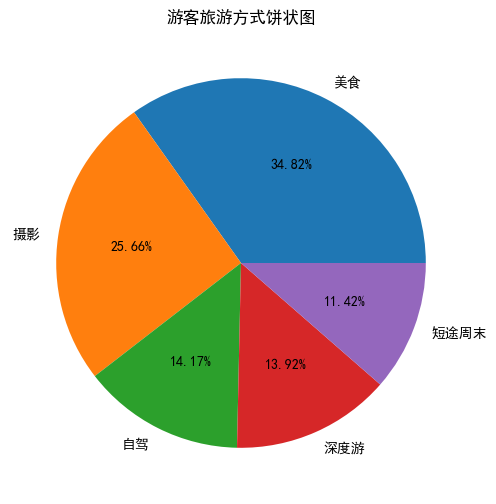

In [33]:
plt.figure(figsize=(8, 6))
plt.title('游客旅游方式饼状图')
plt.pie(df_label_count['次数'], labels=df_label_count.index, autopct='%.2f%%')
plt.show()

## 4.热门地区分析和预测